# **ch.02 데이터 다루기**
## 02-2 데이터 전처리
### 풀어야 할 문제: 
> ### model이 25cm에 150g인 bream을 smelt라고 분류하는 문제를 발견함. 어떻게 해결해야 할까?
### *넘파이로 데이터 준비하기*

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

numpy import

In [2]:
import numpy as np

input data: column_stack()을 활용하여 fish_length와 fish_weight 합치기

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))

In [4]:
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


target data: np.ones(), np.zeros()를 활용하여 1과 0으로 이루어진 배열을 각각 만들고, np.concatenate()를 활용하여 두 배열을 연결

In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [6]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### *사이킷런으로 훈련 세트와 테스트 세트 나누기*
scikit-learn의 train_test_split() function을 활용하여 자동으로 섞여진 train set과 test set 나누기

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [8]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [9]:
print(train_target.shape, test_target.shape)

(36,) (13,)


무작위로 data를 나눌 시, sample이 골고루 잘 섞이지 않을 수 있음. 특히 특정 class의 개수가 적을 때 이런 일이 발생할 수 있음. &rarr; sampling bias 발생

In [10]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


train_test_split()의 stratify parameter에 target data를 전달하여 class 비율에 맞게 data 나누기

In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [12]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### *수상한 도미 한 마리*

준비한 data로 k-nearest neighbors train

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

문제가 있었던 (25,150)의 bream data를 잘 처리하는지 확인

In [14]:
print(kn.predict([[25,150]]))

[0.]


여전히 smelt로 예측함 &rarr; 무슨 일인지 scatter로 확인해 보기

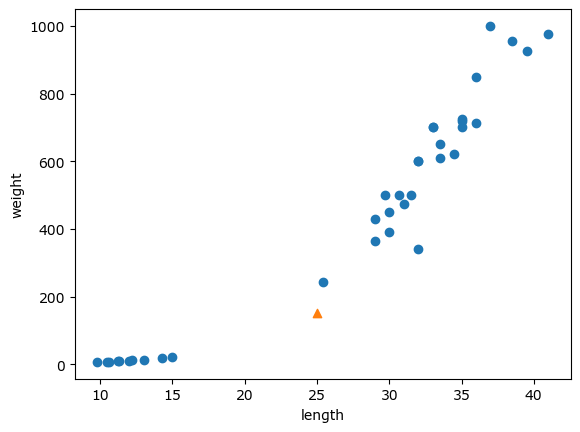

In [15]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k-nearest neighbors는 주변의 sample 중 다수인 classs를 예측으로 활용, 따라서 (25,150)을 bream 이라고 판단한 이유를 살펴보려면 가장 가까운 sample들이 무엇인지 알아야 함


&rarr; kneighbors() method를 활용하여 (25,150)과 가장 가까운 sample찾기

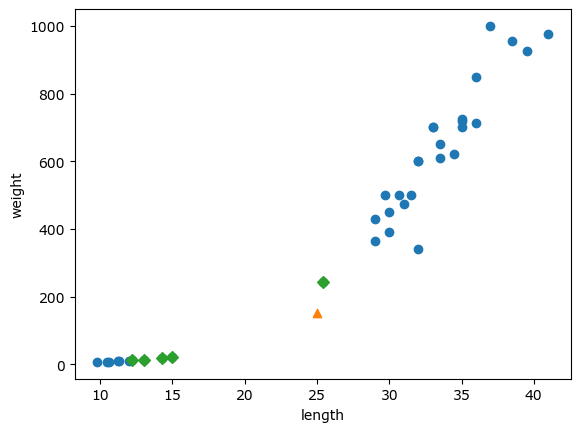

In [16]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

직접 data 확인해 보기


&rarr; 가장 가까운 sample은 bream, 나머지 4개는 smelt

In [17]:
print(train_input[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


가장 가까운 sample 중 4개가 smelt이므로 (25,150)을 smelt로 예측하는 것은 무리가 아닌 것 같음. 그러나 model은 bream으로 예측함.


&rarr; kneighbors() method가 반환한 distances array(근처 sample까지의 거리)를 확인해 보기

In [18]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### *기준을 맞춰라*


앞선 scatter에서는 x acis는 범위가 좁고(10\~40), y axis는 범위가 넒기(0\~1000) 때문에 y axis로 조금만 멀어져도 아주 큰 값으로 계산됨


&rarr; 오른쪽 위의 bream sample이 neighbor로 선택되지 못함

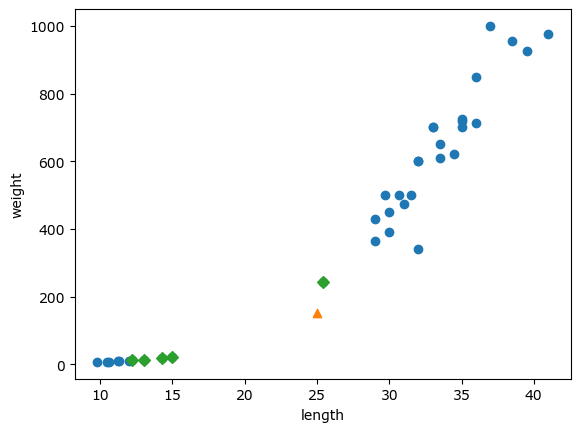

In [19]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이를 확인하기 위해 xlim() function을 사용하여 x axis의 범위를 y axis와 동일하게 0\~1000으로 설정

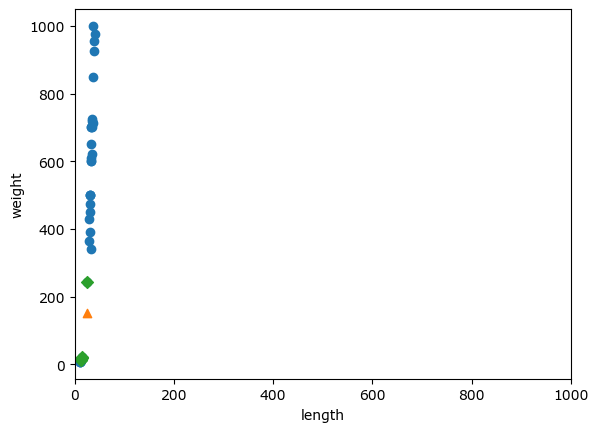

In [20]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim(0, 1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

scatter가 거의 일직선으로 나타남. 이를 통해 length는 neighbor를 찾는 데 큰 영향을 주지 못함을 알 수 있음


&rarr; 두 feature의 scale이 다름. scale이 다르면(data를 표현하는 기준이 다르면) model이 올바르게 예측할 수 없음. 특히 k-nearest neighbors와 같은 distance 기반 model일 경우 영향을 많이 받음


$\therefore$ distance 기반 algorithm은 feature를 일정한 기준으로 맞춰 주어야 함(data preprocessing)


가장 널리 이용하는 preprocessing 중 하나인 standard score(z score)를 활용하여 data preprocessing

In [23]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
train_scaled = (train_input-mean)/std

In [24]:
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


### *전처리 데이터로 모델 훈련하기* 


preprocessing된 train_scaled로 scatter를 그려 확인


&rarr; (25,150) sample에 대해서는 processing하지 않았기 때문에 혼자 동떨어진 scatter가 나타남

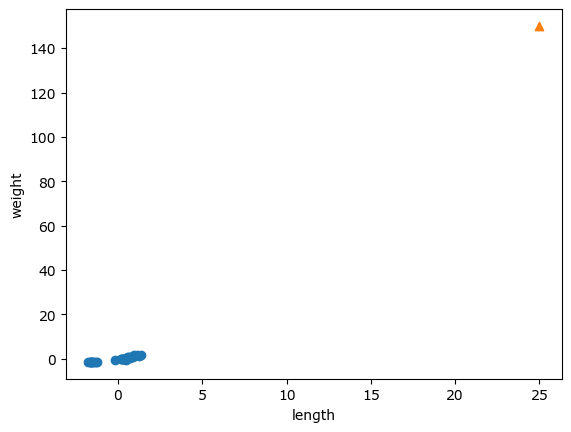

In [25]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

train set의 mean, std를 활용하여 (25,150) sample도 변환하고 다시 scatter 그리기

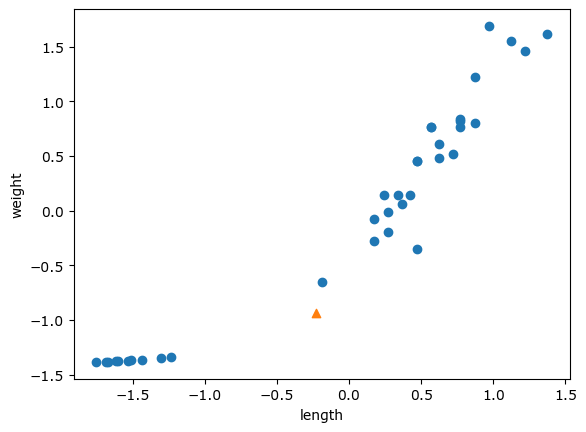

In [26]:
new = ([25, 150]-mean)/std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이제 두 feature가 비숫한 범위를 차지, preprocessing을 진행한 data set으로 다시 train

In [27]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

score하기 전에 test set도 train set과 마찬가지로 같은 scale로 변환해야 함

In [28]:
test_scaled = (test_input-mean)/std

score

In [29]:
kn.score(test_scaled, test_target)

1.0

변환된 (25,150) sample에 대한 예측 결과 확인

In [30]:
print(kn.predict([new]))

[1.]


kneighbors() function으로 이 sample의 neighbors를 구한 후 scatter로 그려보기


&rarr; feature의 scale을 z score로 변환했기에 model이 distance를 올바르게 구했을 것


$\therefore$ neighbors에 변화가 생겼을 것

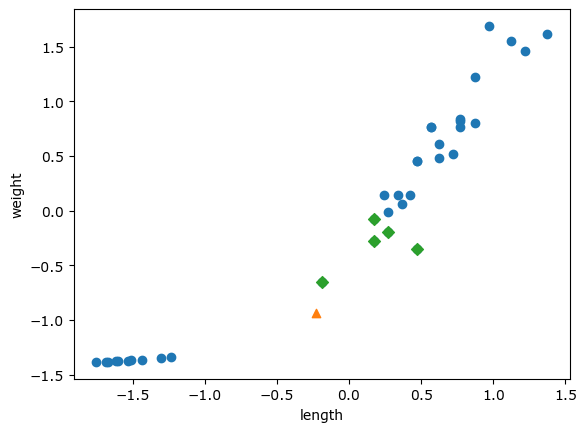

In [31]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()